## Tarea 7
### Simulacion del grado de propagacion de la Covid-19
#### Nombre: Carlos Andrade

En una epidemia, el parámetro fundamental, del que todo depende, es R0. Este símbolo se refiere al número de personas que, mede cada infectado contagia antes de convertirse en inofensivo ( bien porque está en aislamiento, hospitalizado o ha muerto).

Generar 5 simulaciones

##### Datos
Investigar el valor de varianza de R0 en Ecuador.

El valor de varianza de R0 en Ecuador en este mes es: 0.59 - 1.10

La probabilidad de muerte es: 7.1%


Valor 4, para el peor de los casos.

Valor 1.4, en el mejor de los casos.


In [2]:

from random import randrange # Obtener un numero randomico
import pygame

#Parametros de inicio
PROBA_MUERTE = 8.4  # Probabilidad de que la gente muera COVID
CONTAGION_RATE = 4.0  # Factor R0 para la simulacion COVID probabilidad
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0 # Probabilidad de que exista una vacuna, COVID = 0
SIMULACION_SPEED = 50 # Tiempo de un dia en milisegundos (Cada 25 es un dia)
nb_rows = 50 #Numero de filas
nb_cols = 50 #Numero de columnas

global display, myfont, states, states_temp #Declaracion de variables globales

#Declaro colores en formato RGB
WHITE = (255, 255, 255) 
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)

#Obtiene los vecinos dado un punto x,y
def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    #Validar limites
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2] # Nuevos contagiados

#Genero las personas que cuentan con inmunidad o vacuna 
def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1

#Funcion que permite contar el numero de muertosde la matriz states == -1
def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

#Definimos datos de inicio
states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[randrange(50)][randrange(50)] = 10 # Estado inicial de la simulacion Posicion del Infectado
it = 0 # Variable para contar las Iteraciones
total_muerte = 0 # Contabiliza el numero de muertos
vacunar() #Llamar a la funcion vacunar

pygame.init() #Incializo el motor de juegos pygame
pygame.font.init() #Inicializo el tipo de letra
display=pygame.display.set_mode((800,750),0,32) #Tamanio de la ventana
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")# Titulo
font=pygame.font.SysFont('Calibri', 40) # Tipo de letra
display.fill(WHITE) # Color de fondo

while True:
    pygame.time.delay(SIMULACION_SPEED) # Sleep o pausa
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy() #Copia de la matriz
        #Recorrera la matriz
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10: # Numero de dias de contagio
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE: # Genero un randomico para verificar si fallece o se recupera
                        states_temp[x][y] = -1 # Muere
                    else:
                        states_temp[x][y] = 1 # Cura o recupera
                if state >= 10 and state <= 20: # Rango de infectado
                    if randrange(99) < PROBA_INFECT: # Infecto a las personas cercanas entre  10 y 20 
                        neighbour = get_vecinos(x, y) #Obtenemos los vecinos a contagiar
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0: #Verifico que este sano
                            states_temp[x2][y2] = 10 # Contagia
        states = states_temp.copy()
        total_muerte = contar_muertes() # contar el numero de muertos
        
    pygame.draw.rect(display, WHITE, (250, 30, 260, 50)) # Grafico el fondo
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122)) #El numero de muertos
    display.blit(textsurface, (250, 30)) # Graficar el texto de muertes
    #Graficar el estado del paciente matriz
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE # No infectado
            if states[x][y] == 1:
                color = GREEN # Recupero
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50) # Injectado - Rojo
            if states[x][y] == -1:
                color = BLACK # Muerto
            pygame.draw.circle(display, color, (100 + x * 12 + 5, 100 + y * 12 + 5), 5)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 1))
    #Escuachar los eventos del teclado
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE: #Presiona y Escape
            pygame.quit() #Termino simulacion
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE: #Presiona y espacio
            #Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[5][5] = 10
            it = 0
            total_muerte = 0
            vacunar() #Llamar a la funcion vacunar
            
    pygame.display.update()# Mandar actualizar la ventana

pygame 2.0.0 (SDL 2.0.12, python 3.7.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


KeyboardInterrupt: 

COLORES
- Azul No infectado

- Verde Recuperado

- Rojo Infectado

- Negro Muerto

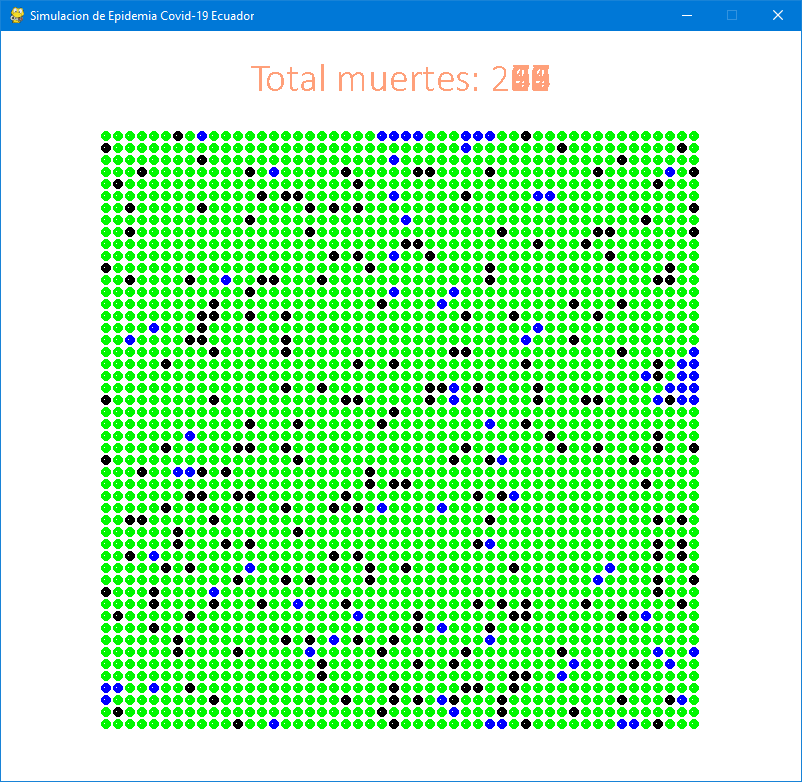

### Valor R0 -> 4

In [3]:
from random import randrange # Obtener un numero randomico
import pygame

#Parametros de inicio
PROBA_MUERTE = 7.1  # Probabilidad de que la gente muera COVID
CONTAGION_RATE = 4  # 0.59 - 1.10 Factor R0 para la simulacion COVID probabilidad
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0 # Probabilidad de que exista una vacuna, COVID = 0
SIMULACION_SPEED = 50 # Tiempo de un dia en milisegundos (Cada 25 es un dia)
nb_rows = 50 #Numero de filas
nb_cols = 50 #Numero de columnas

global display, myfont, states, states_temp #Declaracion de variables globales

#Declaro colores en formato RGB
WHITE = (255, 255, 255) 
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)

#Obtiene los vecinos dado un punto x,y
def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    #Validar limites
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2] # Nuevos contagiados

#Genero las personas que cuentan con inmunidad o vacuna 
def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1

#Funcion que permite contar el numero de muertosde la matriz states == -1
def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

#Definimos datos de inicio
states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[randrange(50)][randrange(50)] = 10 # Estado inicial de la simulacion Posicion del Infectado
it = 0 # Variable para contar las Iteraciones
total_muerte = 0 # Contabiliza el numero de muertos
vacunar() #Llamar a la funcion vacunar

pygame.init() #Incializo el motor de juegos pygame
pygame.font.init() #Inicializo el tipo de letra
display=pygame.display.set_mode((800,750),0,32) #Tamanio de la ventana
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")# Titulo
font=pygame.font.SysFont('Calibri', 40) # Tipo de letra
display.fill(WHITE) # Color de fondo

while True:
    pygame.time.delay(SIMULACION_SPEED) # Sleep o pausa
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy() #Copia de la matriz
        #Recorrera la matriz
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10: # Numero de dias de contagio
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE: # Genero un randomico para verificar si fallece o se recupera
                        states_temp[x][y] = -1 # Muere
                    else:
                        states_temp[x][y] = 1 # Cura o recupera
                if state >= 10 and state <= 20: # Rango de infectado
                    if randrange(99) < PROBA_INFECT: # Infecto a las personas cercanas entre  10 y 20 
                        neighbour = get_vecinos(x, y) #Obtenemos los vecinos a contagiar
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0: #Verifico que este sano
                            states_temp[x2][y2] = 10 # Contagia
        states = states_temp.copy()
        total_muerte = contar_muertes() # contar el numero de muertos
        
    pygame.draw.rect(display, WHITE, (250, 30, 260, 50)) # Grafico el fondo
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122)) #El numero de muertos
    display.blit(textsurface, (250, 30)) # Graficar el texto de muertes
    #Graficar el estado del paciente matriz
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE # No infectado
            if states[x][y] == 1:
                color = GREEN # Recupero
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50) # Injectado - Rojo
            if states[x][y] == -1:
                color = BLACK # Muerto
            pygame.draw.circle(display, color, (100 + x * 12 + 5, 100 + y * 12 + 5), 5)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 1))
    #Escuachar los eventos del teclado
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE: #Presiona y Escape
            pygame.quit() #Termino simulacion
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE: #Presiona y espacio
            #Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[5][5] = 10
            it = 0
            total_muerte = 0
            vacunar() #Llamar a la funcion vacunar
            
    pygame.display.update()# Mandar actualizar la ventana

KeyboardInterrupt: 

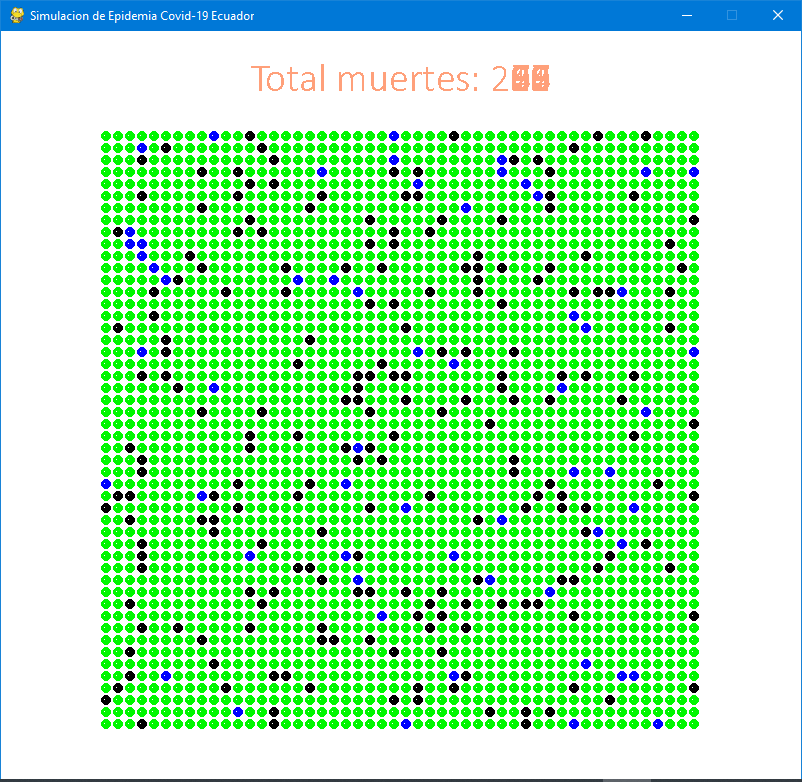


####  Valor R0 -> 1.4¶

In [5]:
from random import randrange # Obtener un numero randomico
import pygame

#Parametros de inicio
PROBA_MUERTE = 7.1  # Probabilidad de que la gente muera COVID
CONTAGION_RATE = 1.4  # 0.59 - 1.10 Factor R0 para la simulacion COVID probabilidad
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0 # Probabilidad de que exista una vacuna, COVID = 0
SIMULACION_SPEED = 50 # Tiempo de un dia en milisegundos (Cada 25 es un dia)
nb_rows = 50 #Numero de filas
nb_cols = 50 #Numero de columnas

global display, myfont, states, states_temp #Declaracion de variables globales

#Declaro colores en formato RGB
WHITE = (255, 255, 255) 
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)

#Obtiene los vecinos dado un punto x,y
def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    #Validar limites
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2] # Nuevos contagiados

#Genero las personas que cuentan con inmunidad o vacuna 
def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1

#Funcion que permite contar el numero de muertosde la matriz states == -1
def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

#Definimos datos de inicio
states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[randrange(50)][randrange(50)] = 10 # Estado inicial de la simulacion Posicion del Infectado
it = 0 # Variable para contar las Iteraciones
total_muerte = 0 # Contabiliza el numero de muertos
vacunar() #Llamar a la funcion vacunar

pygame.init() #Incializo el motor de juegos pygame
pygame.font.init() #Inicializo el tipo de letra
display=pygame.display.set_mode((800,750),0,32) #Tamanio de la ventana
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")# Titulo
font=pygame.font.SysFont('Calibri', 40) # Tipo de letra
display.fill(WHITE) # Color de fondo

while True:
    pygame.time.delay(SIMULACION_SPEED) # Sleep o pausa
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy() #Copia de la matriz
        #Recorrera la matriz
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10: # Numero de dias de contagio
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE: # Genero un randomico para verificar si fallece o se recupera
                        states_temp[x][y] = -1 # Muere
                    else:
                        states_temp[x][y] = 1 # Cura o recupera
                if state >= 10 and state <= 20: # Rango de infectado
                    if randrange(99) < PROBA_INFECT: # Infecto a las personas cercanas entre  10 y 20 
                        neighbour = get_vecinos(x, y) #Obtenemos los vecinos a contagiar
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0: #Verifico que este sano
                            states_temp[x2][y2] = 10 # Contagia
        states = states_temp.copy()
        total_muerte = contar_muertes() # contar el numero de muertos
        
    pygame.draw.rect(display, WHITE, (250, 30, 260, 50)) # Grafico el fondo
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122)) #El numero de muertos
    display.blit(textsurface, (250, 30)) # Graficar el texto de muertes
    #Graficar el estado del paciente matriz
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE # No infectado
            if states[x][y] == 1:
                color = GREEN # Recupero
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50) # Injectado - Rojo
            if states[x][y] == -1:
                color = BLACK # Muerto
            pygame.draw.circle(display, color, (100 + x * 12 + 5, 100 + y * 12 + 5), 5)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 1))
    #Escuachar los eventos del teclado
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE: #Presiona y Escape
            pygame.quit() #Termino simulacion
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE: #Presiona y espacio
            #Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[5][5] = 10
            it = 0
            total_muerte = 0
            vacunar() #Llamar a la funcion vacunar
            
    pygame.display.update()# Mandar actualizar la ventana

KeyboardInterrupt: 

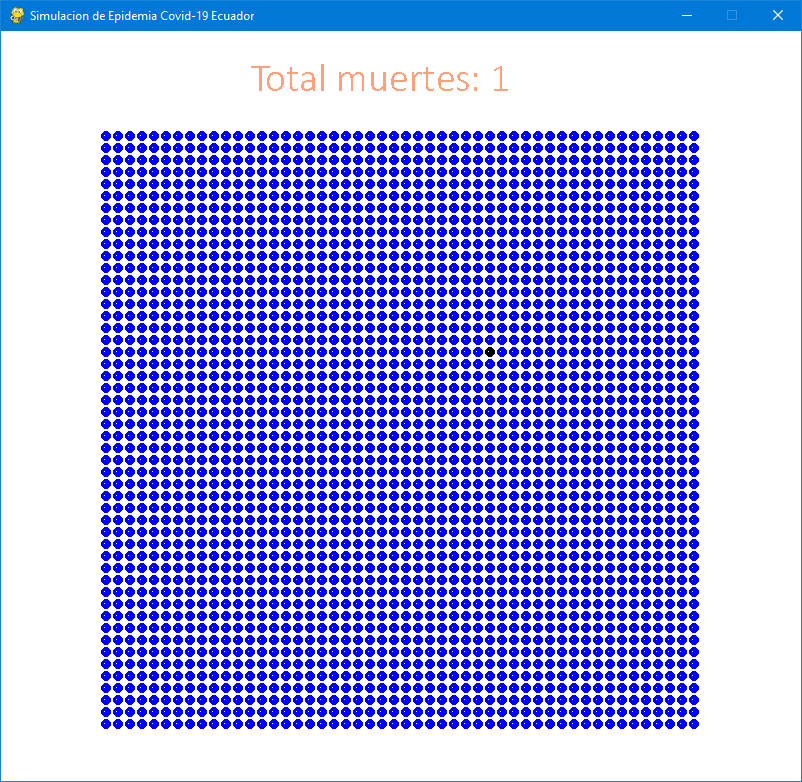

#### Valor R0 -> 1.10


In [1]:
from random import randrange # Obtener un numero randomico
import pygame

#Parametros de inicio
PROBA_MUERTE = 7.1  # Probabilidad de que la gente muera COVID
CONTAGION_RATE = 1.10  # 0.59 - 1.10 Factor R0 para la simulacion COVID probabilidad
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0 # Probabilidad de que exista una vacuna, COVID = 0
SIMULACION_SPEED = 50 # Tiempo de un dia en milisegundos (Cada 25 es un dia)
nb_rows = 50 #Numero de filas
nb_cols = 50 #Numero de columnas

global display, myfont, states, states_temp #Declaracion de variables globales

#Declaro colores en formato RGB
WHITE = (255, 255, 255) 
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)

#Obtiene los vecinos dado un punto x,y
def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    #Validar limites
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2] # Nuevos contagiados

#Genero las personas que cuentan con inmunidad o vacuna 
def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1

#Funcion que permite contar el numero de muertosde la matriz states == -1
def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

#Definimos datos de inicio
states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[randrange(50)][randrange(50)] = 10 # Estado inicial de la simulacion Posicion del Infectado
it = 0 # Variable para contar las Iteraciones
total_muerte = 0 # Contabiliza el numero de muertos
vacunar() #Llamar a la funcion vacunar

pygame.init() #Incializo el motor de juegos pygame
pygame.font.init() #Inicializo el tipo de letra
display=pygame.display.set_mode((800,750),0,32) #Tamanio de la ventana
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")# Titulo
font=pygame.font.SysFont('Calibri', 40) # Tipo de letra
display.fill(WHITE) # Color de fondo

while True:
    pygame.time.delay(SIMULACION_SPEED) # Sleep o pausa
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy() #Copia de la matriz
        #Recorrera la matriz
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10: # Numero de dias de contagio
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE: # Genero un randomico para verificar si fallece o se recupera
                        states_temp[x][y] = -1 # Muere
                    else:
                        states_temp[x][y] = 1 # Cura o recupera
                if state >= 10 and state <= 20: # Rango de infectado
                    if randrange(99) < PROBA_INFECT: # Infecto a las personas cercanas entre  10 y 20 
                        neighbour = get_vecinos(x, y) #Obtenemos los vecinos a contagiar
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0: #Verifico que este sano
                            states_temp[x2][y2] = 10 # Contagia
        states = states_temp.copy()
        total_muerte = contar_muertes() # contar el numero de muertos
        
    pygame.draw.rect(display, WHITE, (250, 30, 260, 50)) # Grafico el fondo
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122)) #El numero de muertos
    display.blit(textsurface, (250, 30)) # Graficar el texto de muertes
    #Graficar el estado del paciente matriz
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE # No infectado
            if states[x][y] == 1:
                color = GREEN # Recupero
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50) # Injectado - Rojo
            if states[x][y] == -1:
                color = BLACK # Muerto
            pygame.draw.circle(display, color, (100 + x * 12 + 5, 100 + y * 12 + 5), 5)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 1))
    #Escuachar los eventos del teclado
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE: #Presiona y Escape
            pygame.quit() #Termino simulacion
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE: #Presiona y espacio
            #Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[5][5] = 10
            it = 0
            total_muerte = 0
            vacunar() #Llamar a la funcion vacunar
            
    pygame.display.update()# Mandar actualizar la ventana

pygame 2.0.0 (SDL 2.0.12, python 3.7.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


KeyboardInterrupt: 

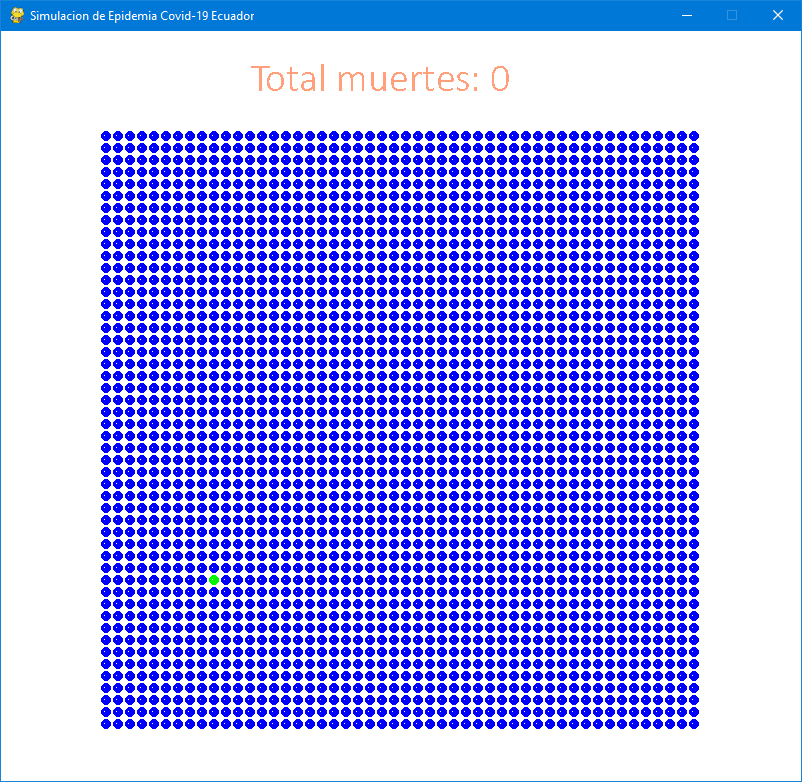

#### Valor R0 -> 0.75

In [1]:
from random import randrange # Obtener un numero randomico
import pygame

#Parametros de inicio
PROBA_MUERTE = 7.1  # Probabilidad de que la gente muera COVID
CONTAGION_RATE = 0.75  # 0.59 - 1.10 Factor R0 para la simulacion COVID probabilidad
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0 # Probabilidad de que exista una vacuna, COVID = 0
SIMULACION_SPEED = 50 # Tiempo de un dia en milisegundos (Cada 25 es un dia)
nb_rows = 50 #Numero de filas
nb_cols = 50 #Numero de columnas

global display, myfont, states, states_temp #Declaracion de variables globales

#Declaro colores en formato RGB
WHITE = (255, 255, 255) 
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)

#Obtiene los vecinos dado un punto x,y
def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    #Validar limites
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2] # Nuevos contagiados

#Genero las personas que cuentan con inmunidad o vacuna 
def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1

#Funcion que permite contar el numero de muertosde la matriz states == -1
def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

#Definimos datos de inicio
states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[randrange(50)][randrange(50)] = 10 # Estado inicial de la simulacion Posicion del Infectado
it = 0 # Variable para contar las Iteraciones
total_muerte = 0 # Contabiliza el numero de muertos
vacunar() #Llamar a la funcion vacunar

pygame.init() #Incializo el motor de juegos pygame
pygame.font.init() #Inicializo el tipo de letra
display=pygame.display.set_mode((800,750),0,32) #Tamanio de la ventana
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")# Titulo
font=pygame.font.SysFont('Calibri', 40) # Tipo de letra
display.fill(WHITE) # Color de fondo

while True:
    pygame.time.delay(SIMULACION_SPEED) # Sleep o pausa
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy() #Copia de la matriz
        #Recorrera la matriz
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10: # Numero de dias de contagio
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE: # Genero un randomico para verificar si fallece o se recupera
                        states_temp[x][y] = -1 # Muere
                    else:
                        states_temp[x][y] = 1 # Cura o recupera
                if state >= 10 and state <= 20: # Rango de infectado
                    if randrange(99) < PROBA_INFECT: # Infecto a las personas cercanas entre  10 y 20 
                        neighbour = get_vecinos(x, y) #Obtenemos los vecinos a contagiar
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0: #Verifico que este sano
                            states_temp[x2][y2] = 10 # Contagia
        states = states_temp.copy()
        total_muerte = contar_muertes() # contar el numero de muertos
        
    pygame.draw.rect(display, WHITE, (250, 30, 260, 50)) # Grafico el fondo
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122)) #El numero de muertos
    display.blit(textsurface, (250, 30)) # Graficar el texto de muertes
    #Graficar el estado del paciente matriz
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE # No infectado
            if states[x][y] == 1:
                color = GREEN # Recupero
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50) # Injectado - Rojo
            if states[x][y] == -1:
                color = BLACK # Muerto
            pygame.draw.circle(display, color, (100 + x * 12 + 5, 100 + y * 12 + 5), 5)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 1))
    #Escuachar los eventos del teclado
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE: #Presiona y Escape
            pygame.quit() #Termino simulacion
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE: #Presiona y espacio
            #Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[5][5] = 10
            it = 0
            total_muerte = 0
            vacunar() #Llamar a la funcion vacunar
            
    pygame.display.update()# Mandar actualizar la ventana

pygame 2.0.0 (SDL 2.0.12, python 3.7.6)
Hello from the pygame community. https://www.pygame.org/contribute.html


KeyboardInterrupt: 

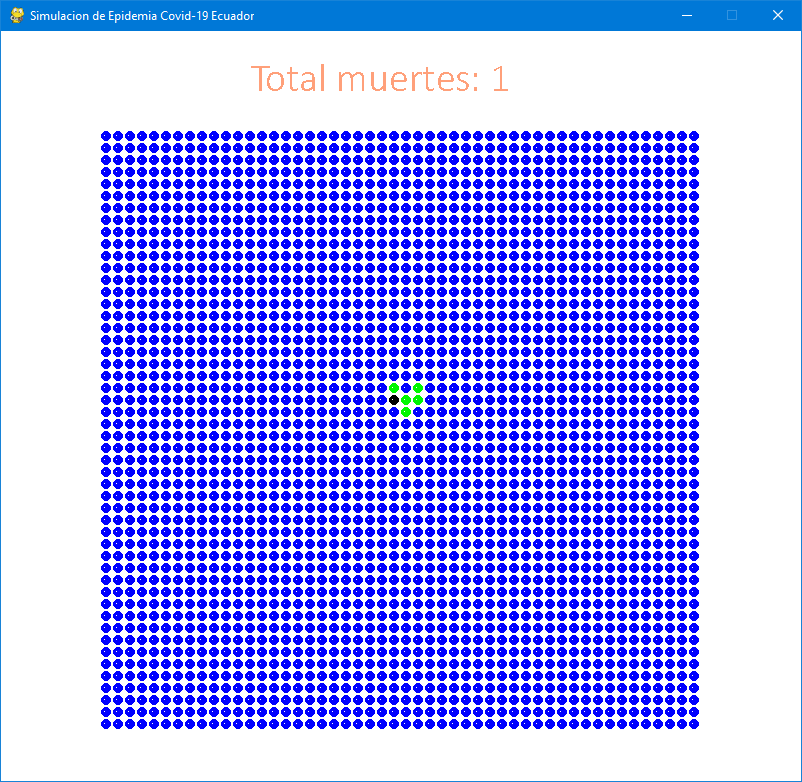

#### Valor R0 -> 0.59

In [ ]:
from random import randrange # Obtener un numero randomico
import pygame

#Parametros de inicio
PROBA_MUERTE = 7.1  # Probabilidad de que la gente muera COVID
CONTAGION_RATE = 0.59  # 0.59 - 1.10 Factor R0 para la simulacion COVID probabilidad
PROBA_INFECT = CONTAGION_RATE * 10
PROBA_VACU = 0 # Probabilidad de que exista una vacuna, COVID = 0
SIMULACION_SPEED = 50 # Tiempo de un dia en milisegundos (Cada 25 es un dia)
nb_rows = 50 #Numero de filas
nb_cols = 50 #Numero de columnas

global display, myfont, states, states_temp #Declaracion de variables globales

#Declaro colores en formato RGB
WHITE = (255, 255, 255) 
BLUE = (0, 0, 255)
GREEN = (0, 247, 0)
BLACK = (0, 0, 0)

#Obtiene los vecinos dado un punto x,y
def get_vecinos(x, y):
    incx = randrange(3)
    incy = randrange(3)
    incx = (incx * 1) - 1
    incy = (incy * 1) - 1
    x2 = x + incx
    y2 = y + incy
    #Validar limites
    if x2 < 0:
        x2 = 0
    if x2 >= nb_cols:
        x2 = nb_cols - 1
    if y2 < 0:
        y2 = 0
    if y2 >= nb_rows:
        y2 = nb_rows - 1
    return [x2, y2] # Nuevos contagiados

#Genero las personas que cuentan con inmunidad o vacuna 
def vacunar():
    for x in range(nb_cols):
        for y in range(nb_rows):
            if randrange(99) < PROBA_VACU:
                states[x][y] = 1

#Funcion que permite contar el numero de muertosde la matriz states == -1
def contar_muertes():
    contador = 0
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == -1:
                contador +=  1
    return contador

#Definimos datos de inicio
states = [[0] * nb_cols for i1 in range(nb_rows)]
states_temp = states.copy()
states[randrange(50)][randrange(50)] = 10 # Estado inicial de la simulacion Posicion del Infectado
it = 0 # Variable para contar las Iteraciones
total_muerte = 0 # Contabiliza el numero de muertos
vacunar() #Llamar a la funcion vacunar

pygame.init() #Incializo el motor de juegos pygame
pygame.font.init() #Inicializo el tipo de letra
display=pygame.display.set_mode((800,750),0,32) #Tamanio de la ventana
pygame.display.set_caption("Simulacion de Epidemia Covid-19 Ecuador")# Titulo
font=pygame.font.SysFont('Calibri', 40) # Tipo de letra
display.fill(WHITE) # Color de fondo

while True:
    pygame.time.delay(SIMULACION_SPEED) # Sleep o pausa
    it = it + 1
    if it <= 10000 and it >= 2:
        states_temp = states.copy() #Copia de la matriz
        #Recorrera la matriz
        for x in range(nb_cols):
            for y in range(nb_rows):
                state = states[x][y]
                if state == -1:
                    pass
                if state >= 10: # Numero de dias de contagio
                    states_temp[x][y] = state + 1
                if state >= 20:
                    if randrange(99) < PROBA_MUERTE: # Genero un randomico para verificar si fallece o se recupera
                        states_temp[x][y] = -1 # Muere
                    else:
                        states_temp[x][y] = 1 # Cura o recupera
                if state >= 10 and state <= 20: # Rango de infectado
                    if randrange(99) < PROBA_INFECT: # Infecto a las personas cercanas entre  10 y 20 
                        neighbour = get_vecinos(x, y) #Obtenemos los vecinos a contagiar
                        x2 = neighbour[0]
                        y2 = neighbour[1]
                        neigh_state = states[x2][y2]
                        if neigh_state == 0: #Verifico que este sano
                            states_temp[x2][y2] = 10 # Contagia
        states = states_temp.copy()
        total_muerte = contar_muertes() # contar el numero de muertos
        
    pygame.draw.rect(display, WHITE, (250, 30, 260, 50)) # Grafico el fondo
    textsurface = font.render("Total muertes: "+ str(total_muerte), False, (255,160,122)) #El numero de muertos
    display.blit(textsurface, (250, 30)) # Graficar el texto de muertes
    #Graficar el estado del paciente matriz
    for x in range(nb_cols):
        for y in range(nb_rows):
            if states[x][y] == 0:
                color = BLUE # No infectado
            if states[x][y] == 1:
                color = GREEN # Recupero
            if states[x][y] >= 10:
                color = (states[x][y] * 12, 50, 50) # Injectado - Rojo
            if states[x][y] == -1:
                color = BLACK # Muerto
            pygame.draw.circle(display, color, (100 + x * 12 + 5, 100 + y * 12 + 5), 5)
            pygame.draw.rect(display, WHITE, (100 + x * 12 + 3, 100 + y * 12 + 4, 1, 1))
    #Escuachar los eventos del teclado
    for event in pygame.event.get():
        if event.type == pygame.KEYDOWN and event.key == pygame.K_ESCAPE: #Presiona y Escape
            pygame.quit() #Termino simulacion
        if event.type == pygame.KEYDOWN and event.key == pygame.K_SPACE: #Presiona y espacio
            #Reiniciamos valores
            states = [[0] * nb_cols for i1 in range(nb_rows)]
            states_temp = states.copy()
            states[5][5] = 10
            it = 0
            total_muerte = 0
            vacunar() #Llamar a la funcion vacunar
            
    pygame.display.update()# Mandar actualizar la ventana

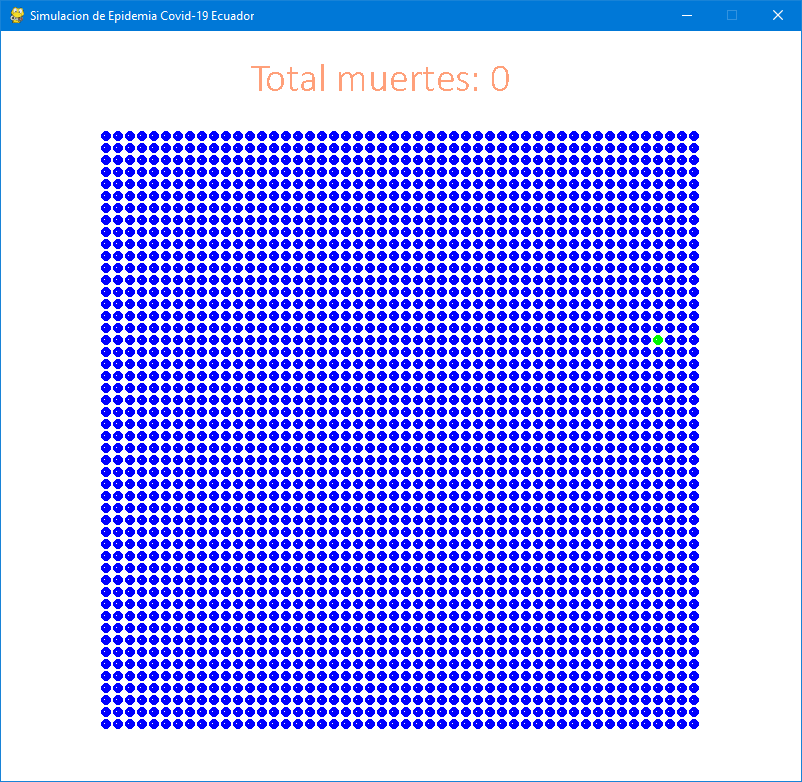

#### Revisar e investigar algun tipo de software que permite simular la taza de contagio en una epidemia, aplicar a los datos del Ecuador y obtener un RO con los datos del pais.

El sábado 14 el periódico The Washington Post publicó un artículo (también disponible en castellano) explicando con una simulación con pelotitas moviéndose en la pantalla por qué el brote de coronavirus crece de la manera que lo hace y por qué el confinamiento ayuda a “aplanar la curva”. Os dejamos aquí el enlace al artículo.

Ayer Mitchel Resnick uno de los creadores de Scratch compartió el proyecto Epidemic Simulation en Scratch inspirado en el artículo. Moviendo una barra se puede seleccionar el porcentaje de personas que “se quedan en casa” y ver los efectos en el número de contagios y la evolución de la curva.
El proyecto es fantástico pero complejo para principiantes. Así que hemos desarrollado una secuencia de pasos para ir llegando a ese programa tan chulo que propone el maestro Resnick pero en pequeños pasos, aptos para los más novatos.



Solución
Recogemos aquí los vídeos explicativos y los proyectos Scratch para los 4 pasos que os proponíamos en esta primera parte. ¡Esperamos que os sean de utilidad!

Paso 1: un individuo sano moviéndose libremente. 
En este paso básico trabajamos:

movimiento por la pantalla
rebote contra los bordes
Aquí tenéis el proyecto Scratch y en el vídeo una pequeña explicación.

Paso 2: dos indivíduos moviéndose libremente.
En este paso podemos trabajar:

creación de un clon
creación de un bloque
  De nuevo os dejamos el enlace al proyecto Scratch y al vídeo explicativo. 
  
Paso 3: Creamos la población.
En este sencillo paso simplemente creamos 100 clones en lugar de 1.  Este es el enlace al proyecto y el vídeo con la explicación.

Paso 4: Creamos el mecanismo de contagio.
  Este es el paso más complicado de esta primera parte. Vamos a distinguir por color individuos sanos de enfermos, contagiar cuando un indivíduo sano “toca” a uno enfermo y llevar la cuenta de los enfermos. Podemos trabajar los siguientes conceptos:

Variables, creación y uso de variables. Variables para todos los sprites y variables para un sprite.
Toma de decisiones: bucle if-then.
Bucles anidados.
Detección de color.
  No os importe dedicarle más tiempo a este paso, sin duda es el más complejo. Esperamos que el vídeo con nuestra explicación que os dejamos a continuación y el proyecto Scratch os sean de ayuda.
  
  
  https://www.logix5.com/roboticaeducativa/simulador-pandemia/

#### Analisis
cuando el valor de R0 es bajo el indice de muertos a causa de la pandemia es menor, la cantidad de fallecidos es mayor a medida R0 es mas alta el punto maximo se alcanza con un R0 = 4 con un minimo de R0=1.4.
#### Conclusiones
podemos observar el alcance de los casos nuevos y como los mismo se propagan primero a las personas mas sercana y el numero de personas que se infectan desde el periodo de  Mediante el R0 nos permite tener un número promedio de casos nuevos que genera un caso dado, a lo largo de un período infeccioso.
#### Opinion
podemos apreciar un creciemiento en los casos como se ve en la simulacion dado que no contamos con un sistema de salud adecuado las personas no toman conciencia de las consecuencias de esta pandemia y las reprecurciones que podria allegar a tener.

#### Referencias
https://www.logix5.com/roboticaeducativa/simulador-pandemia/
http://code.intef.es/simulamos-una-epidemia-virica/
https://www.juanbarrios.com/el-indice-r0-el-indicador-para-administrar-la-pandemia-del-